In [5]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = r"C:\Users\Swanand Potnis\Desktop\Walmart Sales\Walmart_Sales.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure of the data
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0      1  05-02-2010    1643690.90             0        42.31       2.572   
 1      1  12-02-2010    1641957.44             1        38.51       2.548   
 2      1  19-02-2010    1611968.17             0        39.93       2.514   
 3      1  26-02-2010    1409727.59             0        46.63       2.561   
 4      1  05-03-2010    1554806.68             0        46.50       2.625   
 
           CPI  Unemployment  
 0  211.096358         8.106  
 1  211.242170         8.106  
 2  211.289143         8.106  
 3  211.319643         8.106  
 4  211.350143         8.106  ,
 None)

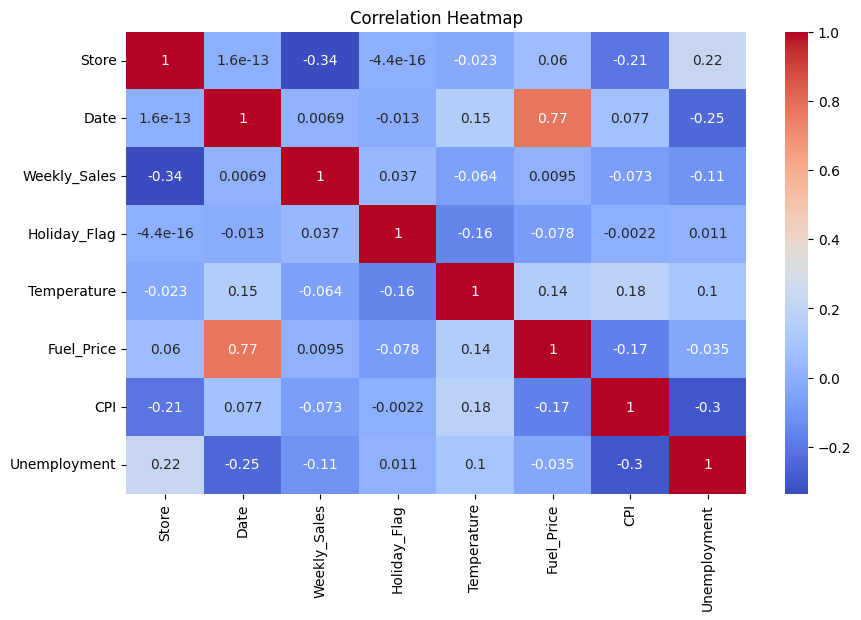

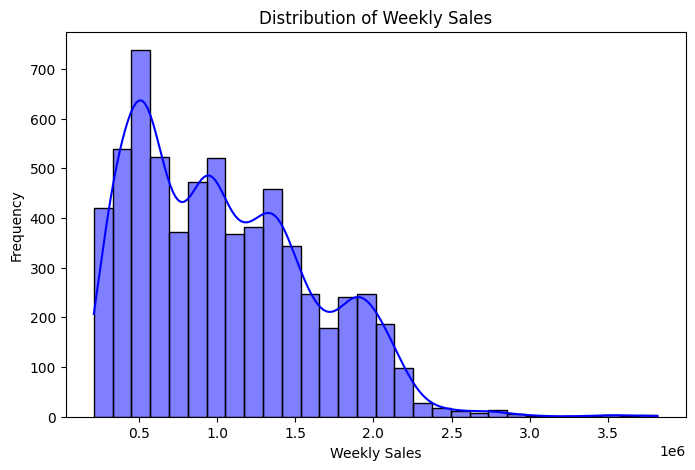

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Descriptive statistics for numerical columns
descriptive_stats = data.describe()

# Visualizing correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Checking the distribution of Weekly_Sales
plt.figure(figsize=(8, 5))
sns.histplot(data['Weekly_Sales'], kde=True, color='blue', bins=30)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

descriptive_stats

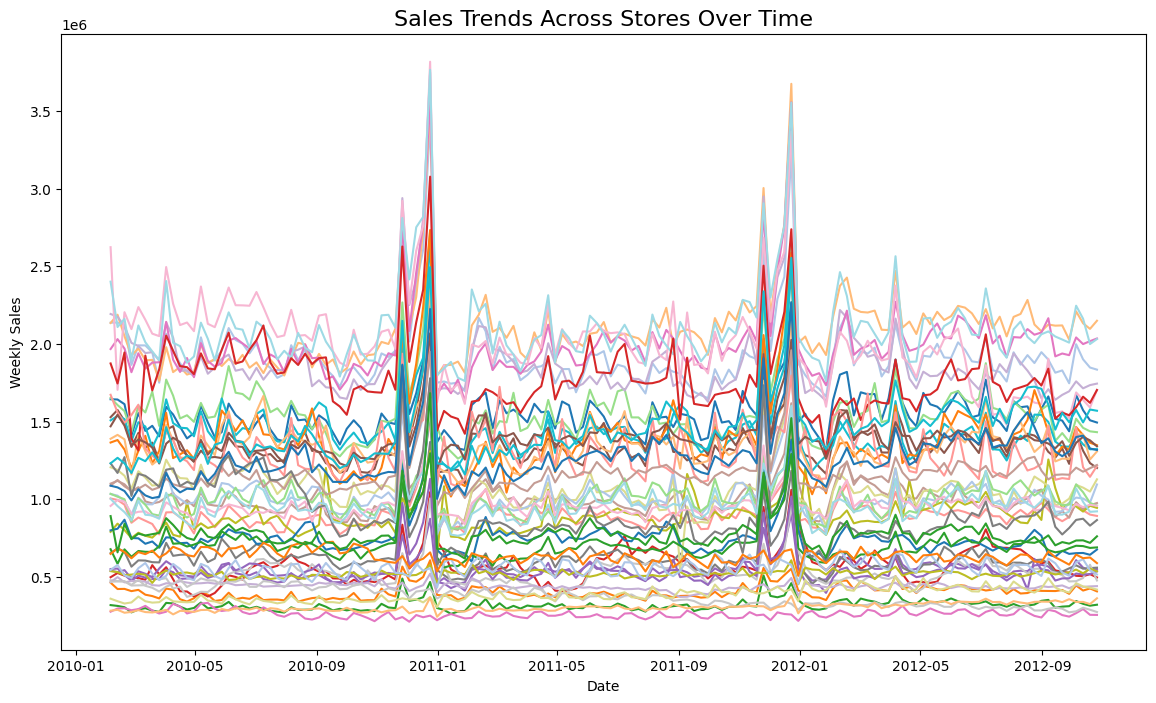

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate weekly sales by store and date
sales_trends = data.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

# Plot sales trends for all stores
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_trends, x='Date', y='Weekly_Sales', hue='Store', palette='tab20', legend=False)
plt.title('Sales Trends Across Stores Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\Swanand Potnis\AppData\Local\Temp\ipykernel_13092\972183794.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_impact_pivot.index, y='Holiday Impact (%)', data=holiday_impact_pivot, palette='coolwarm')


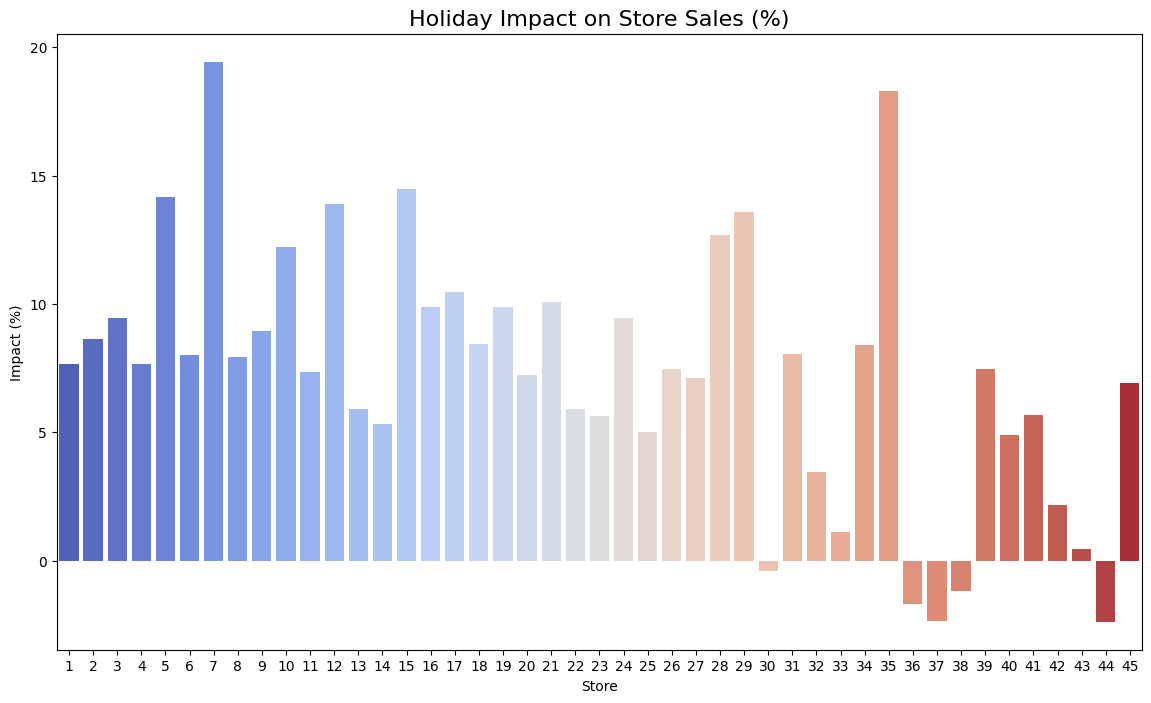

In [8]:
# Aggregate sales by Store and Holiday_Flag
holiday_impact = data.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()

# Pivot for easier plotting
holiday_impact_pivot = holiday_impact.pivot(index='Store', columns='Holiday_Flag', values='Weekly_Sales')
holiday_impact_pivot.columns = ['Non-Holiday Sales', 'Holiday Sales']

# Calculate holiday impact as a ratio
holiday_impact_pivot['Holiday Impact (%)'] = ((holiday_impact_pivot['Holiday Sales'] - holiday_impact_pivot['Non-Holiday Sales']) / holiday_impact_pivot['Non-Holiday Sales']) * 100

# Plot holiday impact
plt.figure(figsize=(14, 8))
sns.barplot(x=holiday_impact_pivot.index, y='Holiday Impact (%)', data=holiday_impact_pivot, palette='coolwarm')
plt.title('Holiday Impact on Store Sales (%)', fontsize=16)
plt.xlabel('Store')
plt.ylabel('Impact (%)')
plt.show()

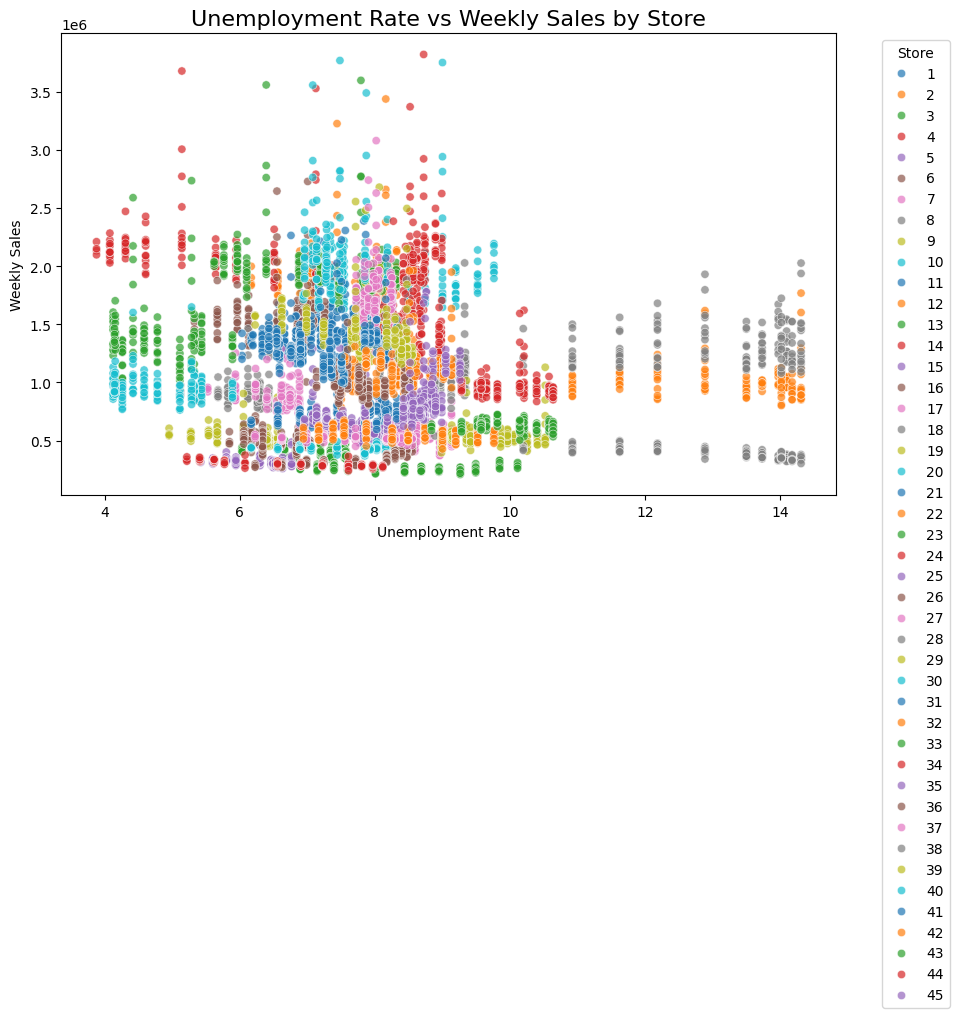

In [9]:
# Scatterplot for unemployment vs weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales', hue='Store', palette='tab10', alpha=0.7)
plt.title('Unemployment Rate vs Weekly Sales by Store', fontsize=16)
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()